<a href="https://colab.research.google.com/github/Ozkum/Assignment-1-Student/blob/master/DL_Assignment_2_(Image_Classification_with_CNN)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [ ]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [ ]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

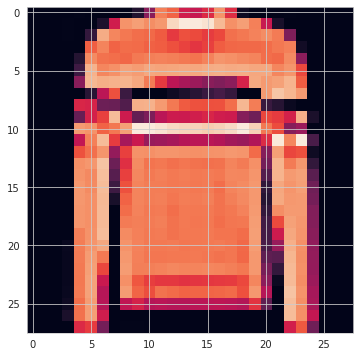

In [ ]:
plt.imshow(x_train[5])


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

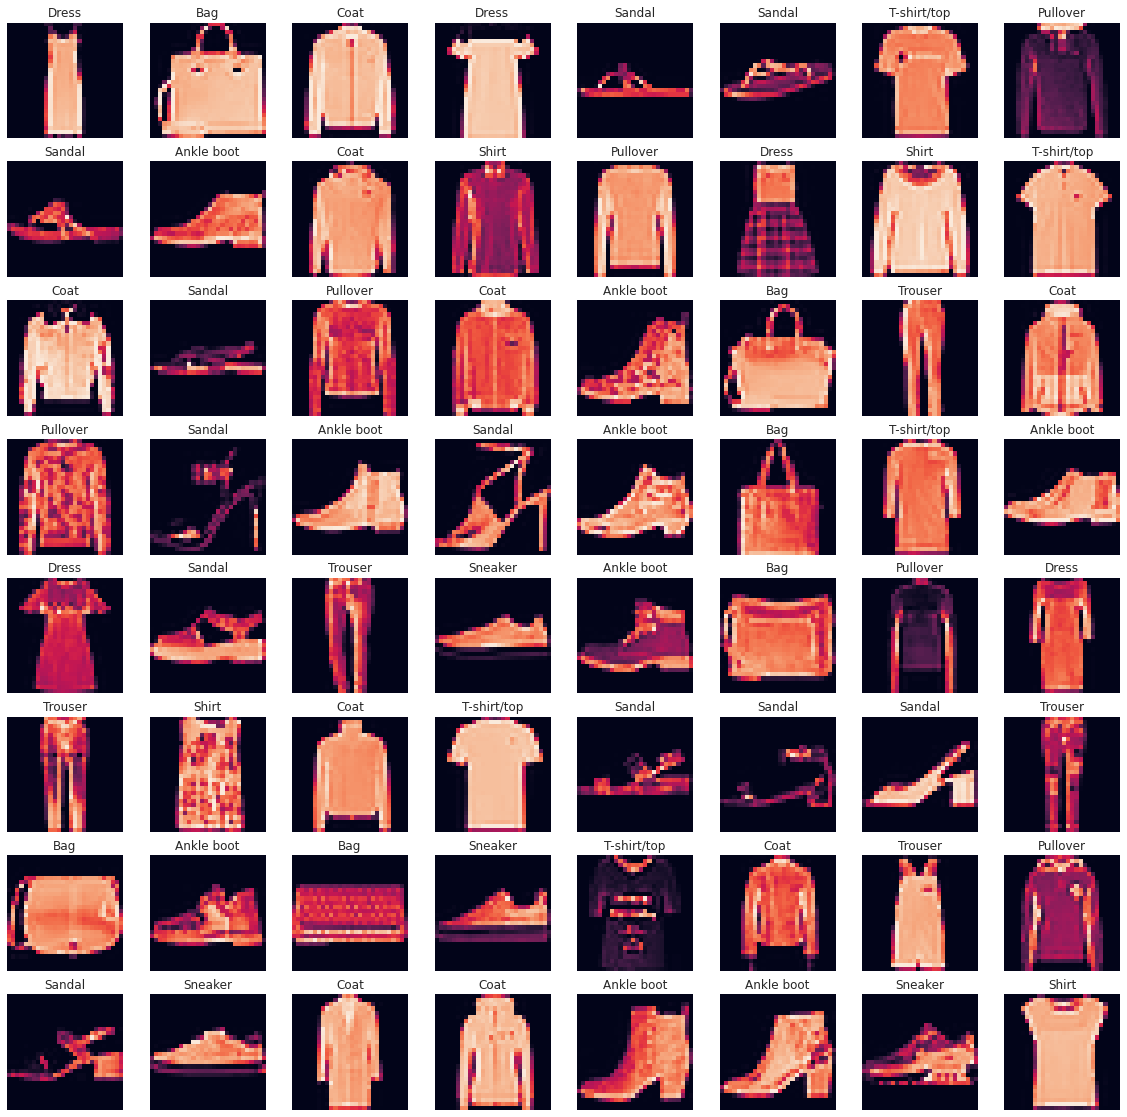

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(x_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [ ]:
x_train[5].min(), x_train[5].max()

(0, 255)

In [ ]:
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
X_train[5].min(), X_train[5].max()

(0.0, 1.0)

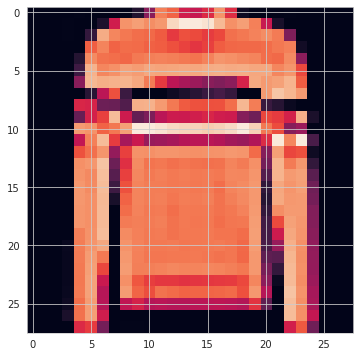

In [ ]:
plt.imshow(X_train[5])

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [ ]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
y_train[0]

9

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [ ]:
model = Sequential()
model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
# kernel_size = (3,3) ideal bu data için
# padding='same' : Bunu "valid" de yapabiliriz. Çok büyük bir kayıp değil. Çünkü objelerimiz resmin
# .. ortasında olduğu için üstten ve yandan 1 piksellik kayıp çok sorun değil.
model.add(Conv2D(filters=28, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
# class chat soru: Hocam 2.conv. layer da filter sayısını 32 den küçük almak daha uygun değil midir?(Hoca da burada 48 yazıyordu)
# John H: Önce büyük yapıp sonra küçültmek daha iyi. Ancak biz overfitting i göstermek için böyle yaptık
model.add(Flatten())
model.add(Dense(128, activation='relu')) # İlk nöronu mümkün olduğu kadar büyük tutuyoruz
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 28)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 28)        7084      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 28)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1372)              0         
                                                                 
 dense_3 (Dense)             (None, 128)              

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 62s 33ms/step - loss: 0.4274 - accuracy: 0.8449 - val_loss: 0.3746 - val_accuracy: 0.8596
Epoch 2/50
1875/1875 [==============================] - 61s 33ms/step - loss: 0.2818 - accuracy: 0.8972 - val_loss: 0.2792 - val_accuracy: 0.8991
Epoch 3/50
1875/1875 [==============================] - 61s 33ms/step - loss: 0.2380 - accuracy: 0.9117 - val_loss: 0.2699 - val_accuracy: 0.9012
Epoch 4/50
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2079 - accuracy: 0.9232 - val_loss: 0.2505 - val_accuracy: 0.9070
Epoch 5/50
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1834 - accuracy: 0.9318 - val_loss: 0.2382 - val_accuracy: 0.9167
Epoch 6/50
1875/1875 [==============================] - 63s 34ms/step - loss: 0.1600 - accuracy: 0.9401 - val_loss: 0.2469 - val_accuracy: 0.9166
Epoch 7/50
1875/1875 [==============================] - 63s 34ms/step - loss: 0.1438 - accuracy: 0.9460 - val_loss: 0.2396 -

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.427,0.845,0.375,0.860
1,0.282,0.897,0.279,0.899
2,0.238,0.912,0.270,0.901
3,0.208,0.923,0.251,0.907
4,0.183,0.932,0.238,0.917


**TASK 7: Plot values of metrics you used in your model.**

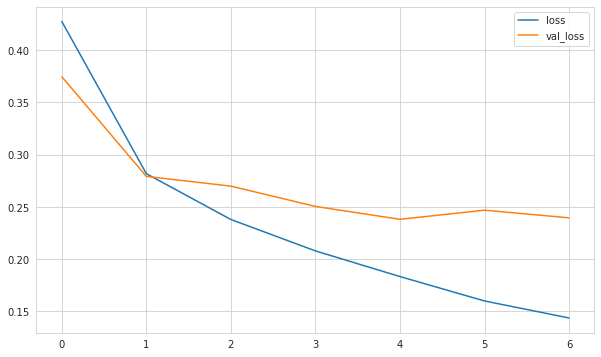

In [ ]:
summary[["loss", "val_loss"]].plot();

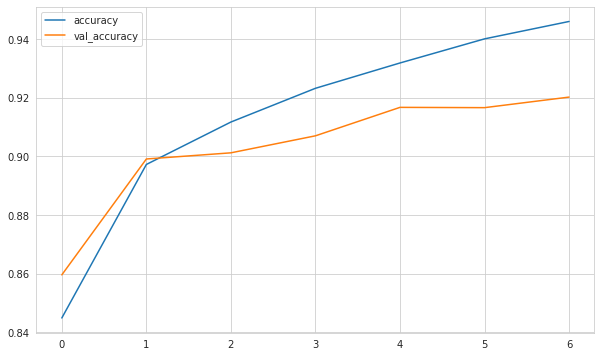

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model.evaluate(X_test, Y_test) 

313/313 [==============================] - 3s 11ms/step - loss: 0.2382 - accuracy: 0.9167


[0.23817913234233856, 0.916700005531311]

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.23817913234233856
Test accuracy: 0.916700005531311


In [ ]:
pred_prob = model.predict(X_test)

In [ ]:
y_pred = np.argmax(pred_prob, axis=1)

In [ ]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1000
           1       1.00      0.98      0.99      1000
           2       0.89      0.83      0.86      1000
           3       0.88      0.96      0.92      1000
           4       0.84      0.91      0.87      1000
           5       0.99      0.98      0.98      1000
           6       0.80      0.72      0.76      1000
           7       0.97      0.96      0.96      1000
           8       0.98      0.99      0.98      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [ ]:
print(confusion_matrix(y_test, y_pred)) 

[[880   0  12  27   3   1  67   0  10   0]
 [  0 982   0  15   1   0   1   0   1   0]
 [ 13   1 827  11  78   0  68   0   2   0]
 [  7   1   6 956  18   0  12   0   0   0]
 [  1   0  33  28 905   0  31   0   2   0]
 [  0   0   1   0   0 977   1  11   3   7]
 [112   2  50  39  74   0 718   0   5   0]
 [  0   0   0   0   0   2   0 958   1  39]
 [  1   0   0   6   1   2   1   0 989   0]
 [  0   0   0   0   0   3   1  21   0 975]]


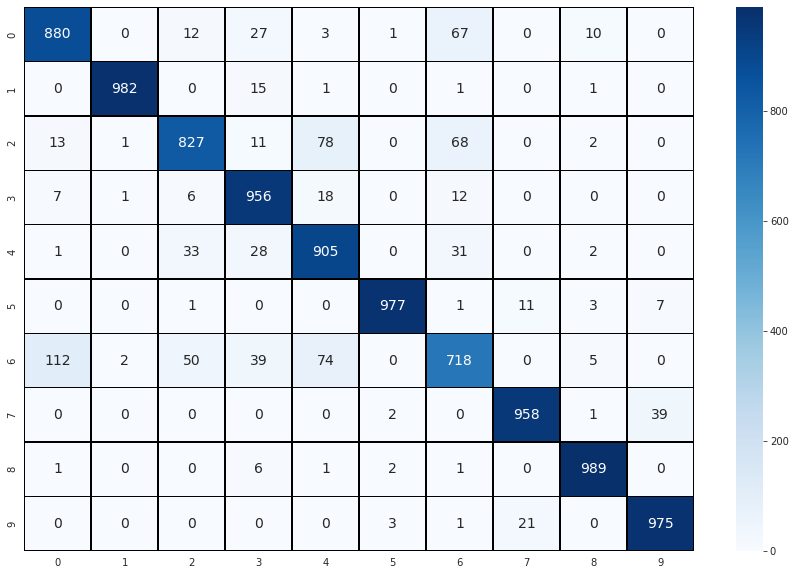

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

## Prediction

In [ ]:
my_image = X_test[46]

In [ ]:
my_image.shape

(28, 28)

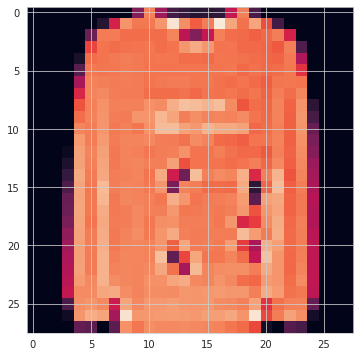

In [ ]:
plt.imshow(my_image)

In [ ]:
image_prediction = model.predict(my_image.reshape(1,28,28,1))

In [ ]:
image_prediction

array([[2.97556464e-02, 2.37082728e-04, 8.58573318e-01, 4.23529511e-03,
        1.68333091e-02, 2.58683922e-05, 8.95039663e-02, 1.91839426e-05,
        7.02164252e-04, 1.14129936e-04]], dtype=float32)

In [ ]:
np.argmax(image_prediction, axis=1)

array([2])

In [ ]:
result=np.argmax(image_prediction, axis=1)

In [ ]:
result

array([2])

In [ ]:
classes[int(result)]

'Pullover'

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___